# handling missing values

1. why are there missing values??
--- it has not been recorded or the data is not available
-  survey info are not that valid. so ppl often do not enter the data
--- people who die their data is not able to capture

- dataset should be collected from multiple sources
- 2 types of missing data - continous data,categorical


2. what are the different types of missing data?
--
1) missing completely at random (mcar)==> ex:titanic dataset
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('E:\data science\ML\Titanic-Dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# why cabin and age have lot of missing values
# -- bcz the data was collected aftr the titanic accident.so age and cabin have
# not been recorded. but they both are related bcz the ppl who died resided in the cabin so.

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
# this is example of missing completely ar random. bcz the embarked missing values 
# have no relationship with any other dataset 

type 2 -- missing data not at random(MNAR) -systematic missing values

-- here there exist relationship between the data that are missing and any other values

In [8]:
# example of cabin and age

In [9]:
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

In [10]:


df['cabin_null'].mean()  # % of null values in the cabin column

0.7710437710437711

In [11]:
# comparing survived and cabin data
df.groupby(['Survived'])['cabin_null'].mean()
# example of MNAR
# here the people who survived are not from cabin

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

type 3 - missing at random (MAR) 
-- men hide their salary
-- women hiding their age
- probability is there

# techniques of handling missing values
1. mean median mode
2. random sample imputation
3. capturing nan values with a new feature
4. end of dist imputation
5. arbitrary imputaion
6. frequent category imputaion
7. forward and backward filling8. KNN imputer

#1.  MEAN MEDIAN MODE IMPUTATION
when to apply --
-- it has the assumption that the data are missing completely at random (MCAR)and we solve this by replacing the nan with most frequent occurance of the variable


In [12]:
df1 = df[['Age','Fare','Survived']]

In [13]:
df1.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [14]:
df1.isnull().mean()

Age         0.198653
Fare        0.000000
Survived    0.000000
dtype: float64

In [15]:
def impute_nan(df,var,median):
    df[var+"_median"] = df[var].fillna(median)

In [16]:
median = df1.Age.median()
median

28.0

In [17]:
impute_nan(df,'Age',median)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0


In [19]:
print(df.Age.std())

14.526497332334044


In [20]:
print(df.Age_median.std())

13.019696550973194


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

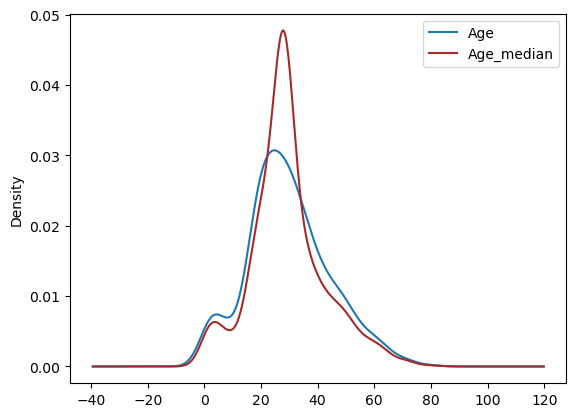

In [22]:
fig=plt.figure()
ax= fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='brown')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


advantages of mmm imputation
- easy to implement(robust to outliers)
- faster way to obtain the complete dataset

disadvantages
- change in the original variance/std
- it impacts correlation
-

2. RANDOM SAMPLING IMPUTATION
-- aim ==> consists of taking random observations and we use these random values to replace the nan values

when to use-- it assumes that the data are missing completely at random(MCAR)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0


In [31]:
df[['Survived','Age','Fare']].isnull()

Survived      0
Age         177
Fare          0
dtype: int64

In [34]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [35]:
def impute_nan_random(df,var):
    df[var+"_random"] = df[var]
    random_sample = df[var].dropna().sample(df['Age'].isnull().sum(),random_state=0)
    random_sample.index = df[df[var].isnull()].index
    df.loc[df[var].isnull(),var+'_random'] = random_sample
    
    # this function qwill have the random sample to fill the na    

In [36]:
impute_nan_random(df,'Age')

In [42]:
df[15:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median,Age_random
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,NaN,S,1,55.0,55.00
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,1,2.0,2.00
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.000,NaN,S,1,28.0,50.00
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.000,NaN,S,1,31.0,31.00
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C,1,28.0,0.92


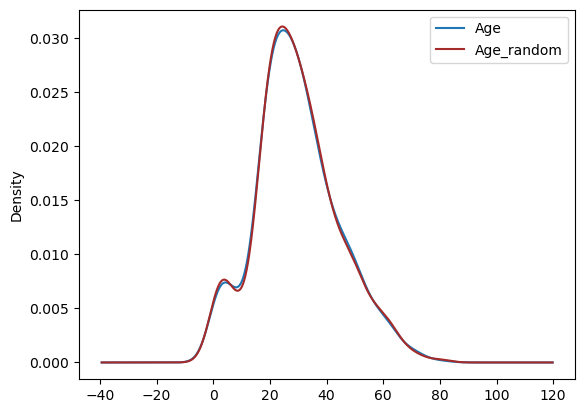

In [43]:
fig=plt.figure()
ax= fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='brown')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [ ]:
# here with the random sample computation we get exactly same curve
# so we should go with random sample computaion

 Advantages of random sampling computaion
 1. easy to implement
 2. there is no distortion in variance
 
 disadvantage
 1. in every situation randomness wont work

# # 3. capturing nan values with new feature


   it works well if the data are not missingly completely at random (MNAR)

In [44]:
df[['Survived','Age','Fare']]

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [45]:
df['Age_nan'] = np.where(df['Age'].isnull(),1,0)
# replcaing the nan values with 1, other values with 0

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median,Age_random,Age_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,22.0,22.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,38.0,38.0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0,26.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,35.0,35.0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,35.0,35.0,0


Advantages
- easy to impliment
- captures the importance of missing values
- 

Disadvantage
- creating additional features(curse of dimentionality)

## 4. end of dist imputation

--  if the missing valueis not random then capturing that information is important . so here we would replace missing data with values that are at the tails of distribution of variable

In [47]:
df[['Survived','Age','Fare']]

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


<Axes: >

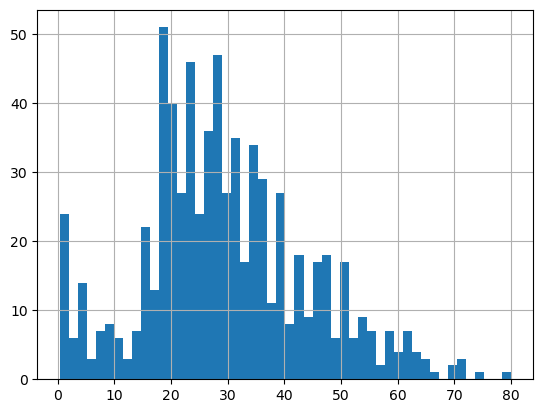

In [48]:
df.Age.hist(bins=50)

In [55]:
# we take the 3rd std of far end of dist 
extreme = df.Age.mean()+3*df.Age.std()

<Axes: xlabel='Age'>

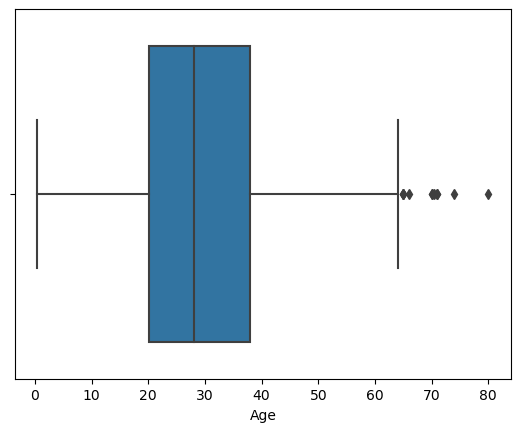

In [54]:
import seaborn as sns
sns.boxplot(x='Age',data=df)

In [56]:
def impute_nan_end(df,var,extreme):
    df[var+'_end_distribution'] = df[var].fillna(extreme)
    
    

In [57]:
impute_nan_end(df,'Age',extreme)

In [60]:
df[15:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median,Age_random,Age_nan,Age_end_distribution
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,NaN,S,1,55.0,55.00,0,55.00000
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,1,2.0,2.00,0,2.00000
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.000,NaN,S,1,28.0,50.00,1,73.27861
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.000,NaN,S,1,31.0,31.00,0,31.00000
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C,1,28.0,0.92,1,73.27861


<Axes: >

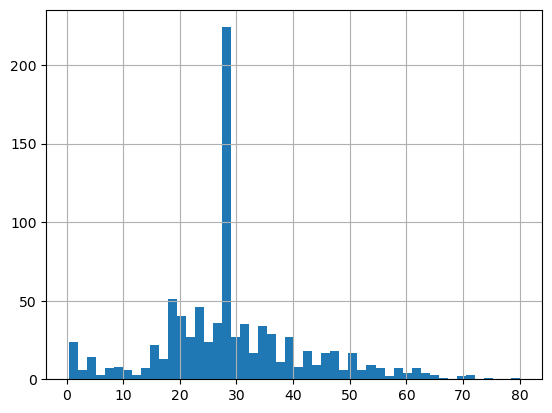

In [61]:
df['Age_median'].hist(bins=50)

<Axes: >

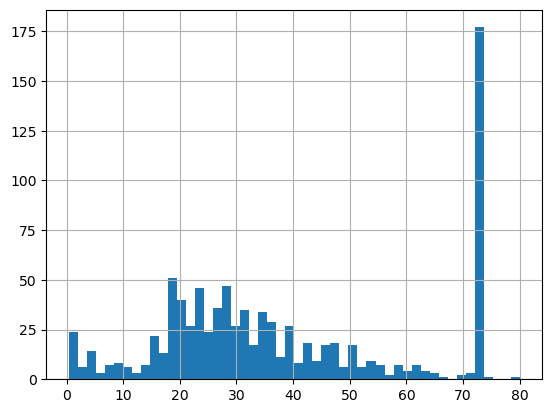

In [62]:
df['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

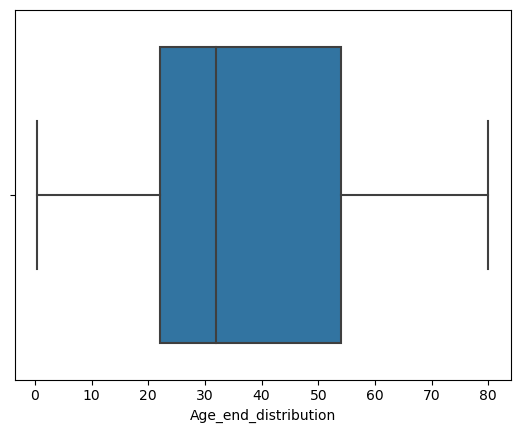

In [64]:
sns.boxplot(x='Age_end_distribution',data=df)
# here the outlier has been captured using this method

Advantages
- easy to implement
-captures the importance of missing values if there is one

disadvantages
- distort the original ditribution of variables
- if missingness is not imp , it may mask the predictive power of original variables by distorting the dist
- if the number of NA is big , it will mask true outliers in the distribution
- if the number of NA is small, the replaced NA may be considered an outlier and preprocesed int he subsequent feauture engg

## 5.Arbitrary  data imputation

--  it consists of replacing the nan by arbitrary values.
--  this technique was derived from kaggle competition


--arbitrary values should not be frequent

advantages
- easy to implement
- captures the imp of missing values if there are any

disadvantages
- distort the original ditribution of variables
- if missingness is not imp , it may mask the predictive power of original    variables by distorting the dist
- hard to decide which value to use


In [65]:
df[['Survived','Age','Fare']]

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [66]:
def impute_nan_arbitrary(df,var):
    df[var+'_hundred'] = df[var].fillna(100)
    df[var+'_zeroes'] = df[var].fillna(0)

In [67]:
impute_nan_arbitrary(df,'Age')

In [69]:
df[15:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null,Age_median,Age_random,Age_nan,Age_end_distribution,Age_hundred,Age_zeroes
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,NaN,S,1,55.0,55.00,0,55.00000,55.0,55.0
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,1,2.0,2.00,0,2.00000,2.0,2.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.000,NaN,S,1,28.0,50.00,1,73.27861,100.0,0.0
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.000,NaN,S,1,31.0,31.00,0,31.00000,31.0,31.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C,1,28.0,0.92,1,73.27861,100.0,0.0


### 6. forward filling/backward filling

- Forward fill (ffill) and backward fill (bfill) are two methods of filling missing values in a pandas dataframe. Forward fill    replaces missing values with the previous non-missing value, while backward fill replaces missing values with the next non-missing value. 
- this method is used in filling time series missing values
- pandas has built in function ffill and bfill

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.Age.isnull().sum()

177

In [10]:
df['Age_ffill'] = df['Age'].ffill()

In [12]:
df[15:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_ffill
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,NaN,S,55.0
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,2.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.000,NaN,S,2.0
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.000,NaN,S,31.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C,31.0


In [13]:
df['Age_bfill'] = df['Age'].bfill()

In [15]:
df[15:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_ffill,Age_bfill
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,NaN,S,55.0,55.0
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,2.0,2.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.000,NaN,S,2.0,31.0
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.000,NaN,S,31.0,31.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C,31.0,35.0


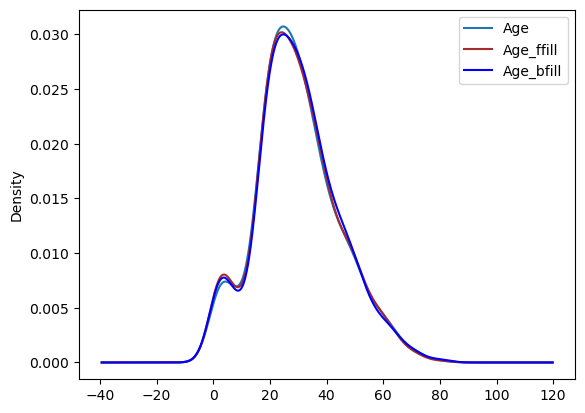

In [16]:
import matplotlib.pyplot as plt

fig=plt.figure()
ax= fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_ffill.plot(kind='kde',ax=ax,color='brown')
df.Age_bfill.plot(kind='kde',ax=ax,color='blue')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

- ffill and bfill match the age column .

### 7. KNN Imputer

- works on the KNN algorithm

In [21]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)
x = imputer.fit_transform(pd.DataFrame(df['Age']))


In [23]:
df['Age_knn'] = x

In [24]:
df[15:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_ffill,Age_bfill,Age_knn
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.000,NaN,S,55.0,55.0,55.000000
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q,2.0,2.0,2.000000
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.000,NaN,S,2.0,31.0,29.699118
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.000,NaN,S,31.0,31.0,31.000000
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.225,NaN,C,31.0,35.0,29.699118


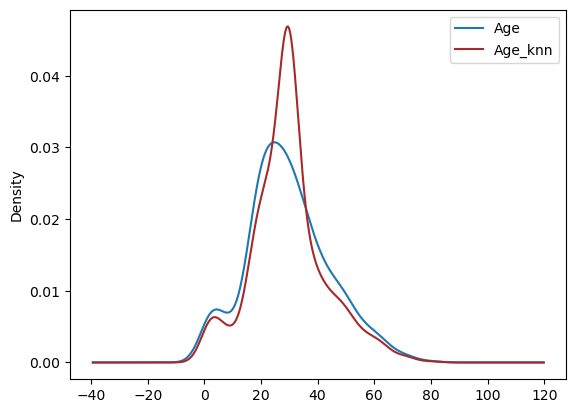

In [25]:
fig=plt.figure()
ax= fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_knn.plot(kind='kde',ax=ax,color='brown')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')